In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
#Drop unnamed column
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Change Weekly Study hours Column

In [10]:
#change weekly study hours column
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Gender Distribution

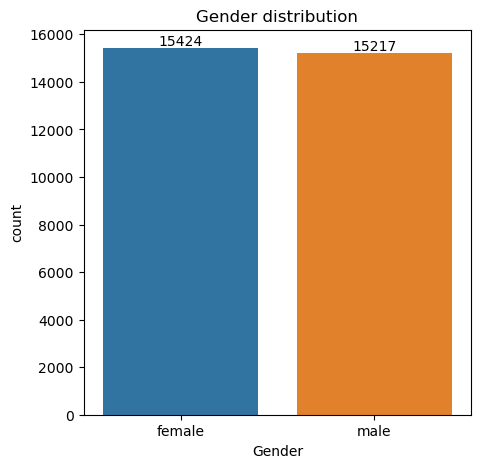

In [29]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])  
plt.title("Gender distribution")
plt.show()

In [ ]:
#from the above chart we have analysed that:
#the number of females in the data is more than the numbers of males

In [20]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


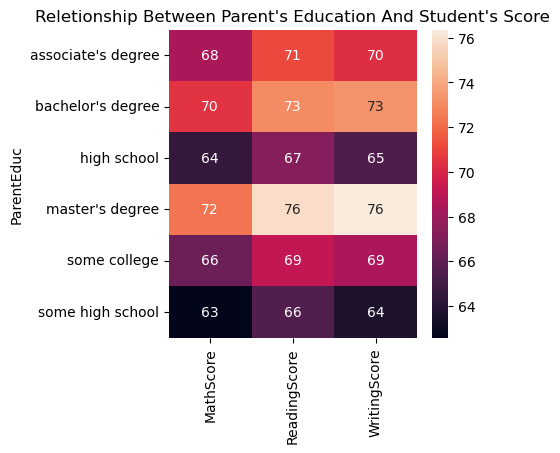

In [30]:
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True)
plt.title("Reletionship Between Parent's Education And Student's Score")
plt.show()

In [26]:
#from the about chart we have concluded that the education of the parents have a good impact on their score

# Reletionship Between Parent's Matital Status And Student's Score

In [27]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


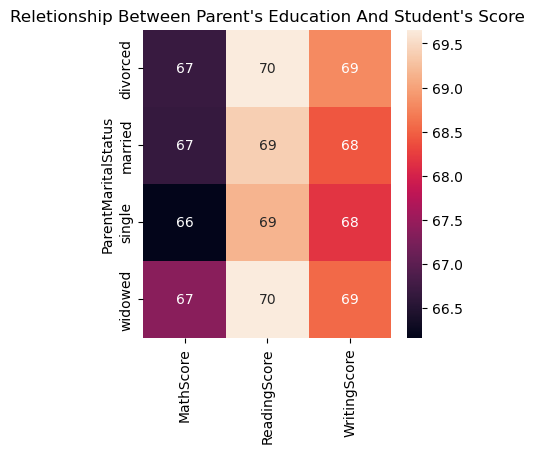

In [31]:
plt.figure(figsize = (4,4))
sns.heatmap(gb1, annot = True)
plt.title("Reletionship Between Parent's Matital Status And Student's Score")
plt.show()

In [32]:
#from the above chart we have concluded that there is no/negligible impact on the
#student's score due to their parent's marital status

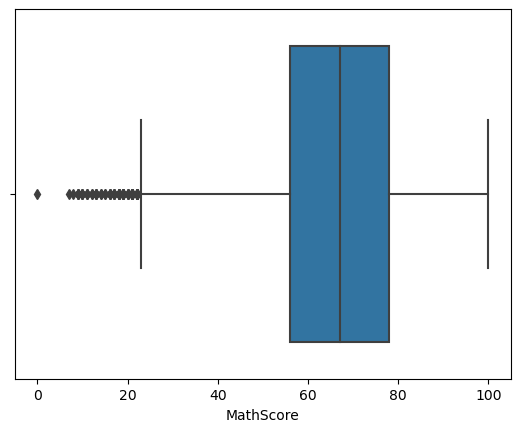

In [33]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

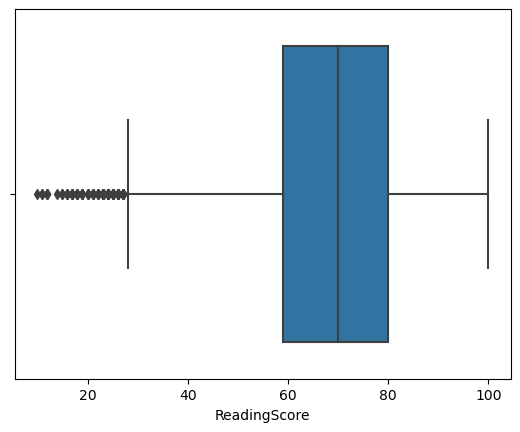

In [34]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

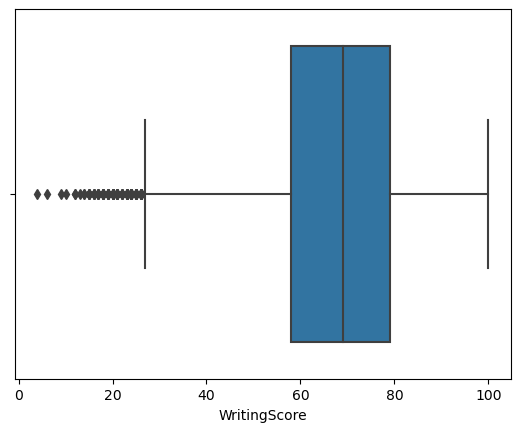

In [35]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

In [36]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

# Distribution And Anlyze Of Ethnic Groups

[2219, 5826, 9212, 7503, 4041]


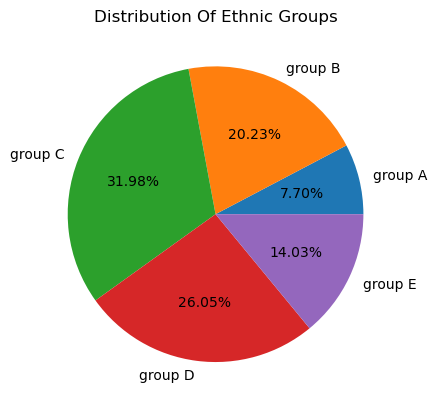

In [58]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

l = ["group A", "group B", "group C", "group D", "group E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
print(mlist)
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.title("Distribution Of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

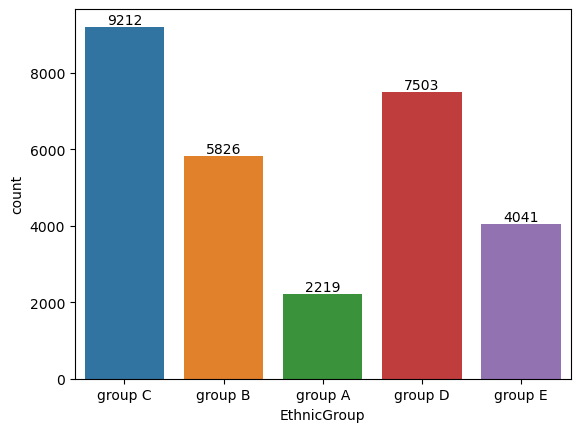

In [60]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])

In [84]:
ethnicgroup_analysis = df.groupby('EthnicGroup')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
ethnicgroup_analysis

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,62.991888,66.787742,65.251915
group B,63.490216,67.320460,65.895125
group C,64.695723,68.438233,66.999240
group D,67.666400,70.382247,70.890844
group E,75.298936,74.251423,72.677060


# Test Preparation Impact

In [69]:
testprep_analysis = df.groupby('TestPrep').agg({
    'MathScore': 'mean',
    'ReadingScore': 'mean',
    'WritingScore': 'mean'
})
testprep_counts = df['TestPrep'].value_counts()
total_count = len(df)
testprep_percentages = (testprep_counts / total_count) * 100

result = pd.concat([testprep_counts, testprep_percentages], axis=1)
result.columns = ['Count', 'Percentage']
result = result.round(1) 

print(result)
print(testprep_analysis)

           Count  Percentage
none       18856        61.5
completed   9955        32.5
           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


# Impact Of Weekly Working Hours On The Exam Score

C:\Users\yigit_5rkz30x\AppData\Local\Temp\ipykernel_13004\4210757269.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wklystudy_analysis = grouped_wklystudy.mean()


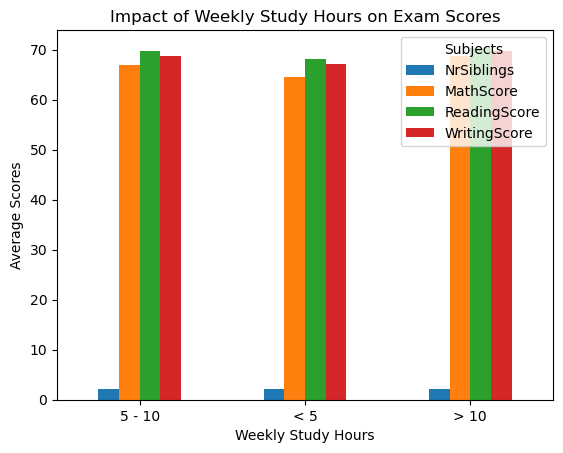

                NrSiblings  MathScore  ReadingScore  WritingScore
WklyStudyHours                                                   
5 - 10            2.145609  66.870491     69.660532     68.636280
< 5               2.138371  64.580359     68.176135     67.090192
> 10              2.156511  68.696655     70.365436     69.777778


In [81]:
grouped_wklystudy = df.groupby('WklyStudyHours')
wklystudy_analysis = grouped_wklystudy.mean()

wklystudy_analysis.plot(kind='bar')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Scores')
plt.title('Impact of Weekly Study Hours on Exam Scores')
plt.legend(title='Subjects', loc='upper right')
plt.xticks(rotation=0)
plt.show()

print(wklystudy_analysis)

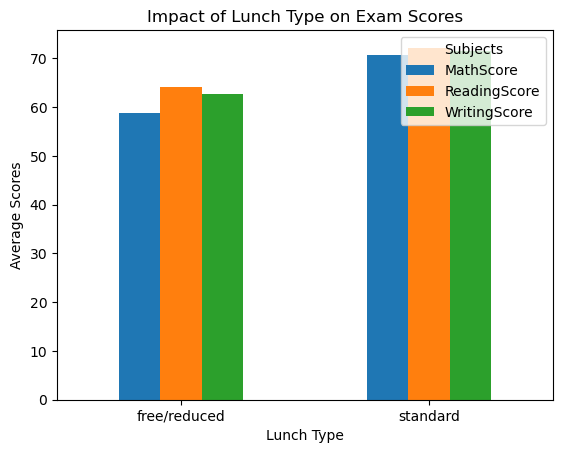

In [74]:
lunchtype_analysis = df.groupby('LunchType')[['MathScore', 'ReadingScore', 'WritingScore']].mean()


# Görselleştirme
lunchtype_analysis.plot(kind='bar')
plt.xlabel('Lunch Type')
plt.ylabel('Average Scores')
plt.title('Impact of Lunch Type on Exam Scores')
plt.legend(title='Subjects', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Analysis of Is First Child Status

In [78]:
isfirstchild_analysis = df.groupby('IsFirstChild')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
isfirstchild_counts = df['IsFirstChild'].value_counts()
total_count = len(df)
isfirstchild_percentages = (isfirstchild_counts / total_count) * 100

print("Analysis of 'IsFirstChild' Status:\n")
print(isfirstchild_analysis)
print("\nThe distribution of 'IsFirstChild' status:\n")
print("Yes: {:.1f}%".format(isfirstchild_percentages['yes']))
print("No: {:.1f}%".format(isfirstchild_percentages['no']))








Analysis of 'IsFirstChild' Status:

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484

The distribution of 'IsFirstChild' status:

Yes: 62.3%
No: 34.8%


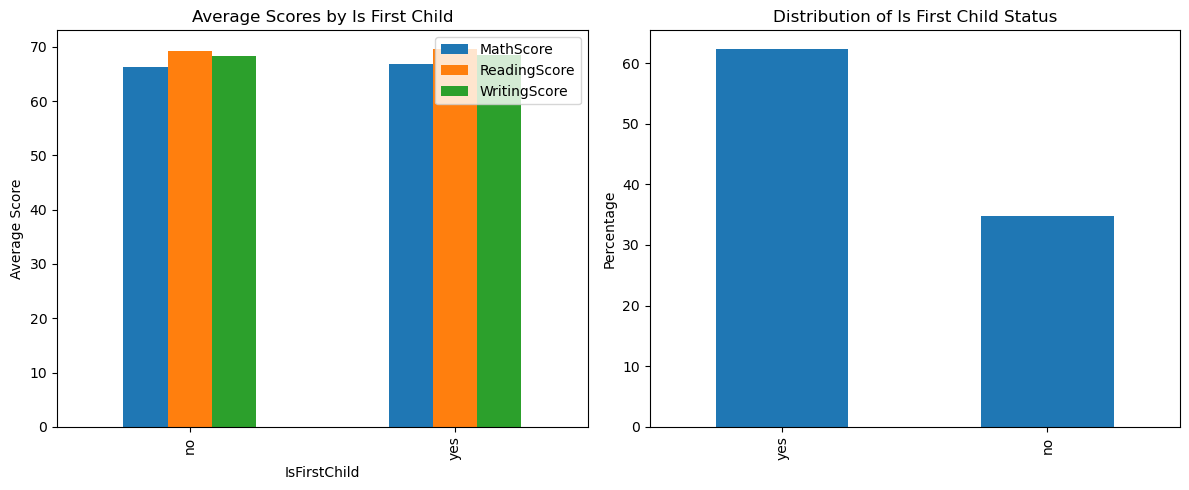

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
isfirstchild_analysis.plot(kind='bar', ax=axes[0])
axes[0].set_title("Average Scores by Is First Child")
axes[0].set_ylabel("Average Score")
isfirstchild_percentages.plot(kind='bar', ax=axes[1])
axes[1].set_title("Distribution of Is First Child Status")
axes[1].set_ylabel("Percentage")

plt.tight_layout()
plt.show()

# Analysis of the Impact of Doing Sports on Exam Scores

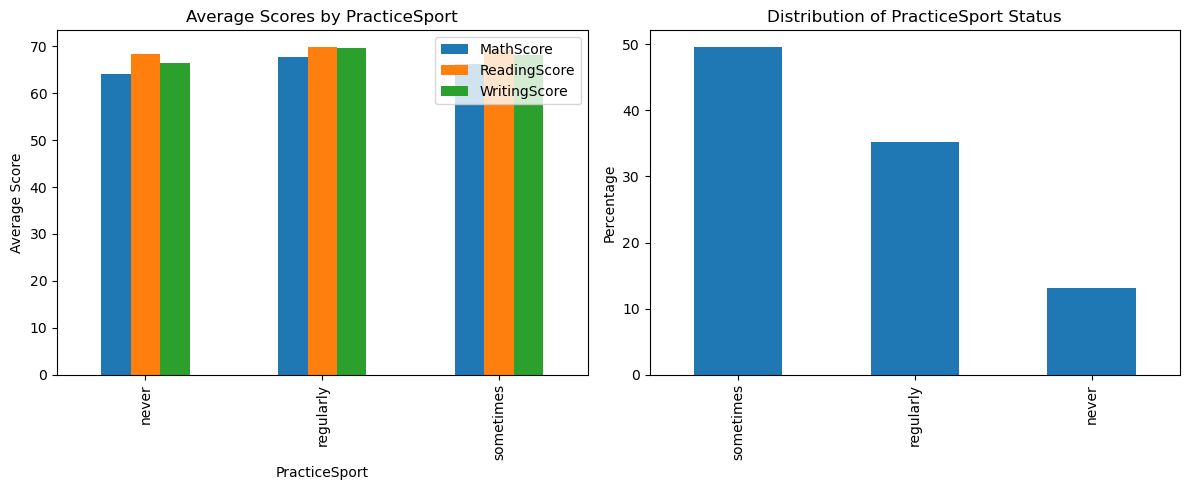

In [87]:
practicesport_analysis = df.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
practicesport_counts = df['PracticeSport'].value_counts()
total_count = len(df)
practicesport_percentages = (practicesport_counts / total_count) * 100


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


practicesport_analysis.plot(kind='bar', ax=axes[0])
axes[0].set_title("Average Scores by PracticeSport")
axes[0].set_ylabel("Average Score")


practicesport_percentages.plot(kind='bar', ax=axes[1])
axes[1].set_title("Distribution of PracticeSport Status")
axes[1].set_ylabel("Percentage")

plt.tight_layout()
plt.show()